In [15]:
import glob

def GetFileNames():
    files = glob.glob("./Benchmarks/*.json")
    files.sort()
    return files

files = GetFileNames()

In [16]:
import json
from statistics import mean
from statistics import stdev

def ExtractData(fileName):
    with open(fileName) as f:
        data = json.load(f)
        name = data["benchmark"]
        customers = data["customers"]
        demands = [x := customer["demand"] for customer in customers]
        capacity = data["fleetSize"] * data["vehicleCapcity"]
        sums = sum(demands)
        std = stdev(demands)
        return name, sums, std, capacity
    
ExtractData(fileName=files[0])

('A-n32-k5', 410, 7.511013419016448, 500)

In [44]:
import pandas as pd

df = pd.DataFrame(columns=["Benchmark", "Sum of Demand", "Std Demand", "Delivery Capacity"])
files = GetFileNames()
for file in files:
    name, sums, std, capacity = ExtractData(fileName=file)
    df.loc[len(df)] = [name, sums, std, capacity]
df

,Benchmark,Sum of Demand,Std Demand,Delivery Capacity
0,A-n32-k5,410,7.511013,500
1,A-n33-k5,446,6.704109,500
2,A-n33-k6,541,11.597250,600
3,A-n34-k5,460,7.520619,500
4,A-n36-k5,442,6.826884,500
...,...,...,...,...
87,P-n60-k15,1134,7.432635,1200
88,P-n65-k10,1219,7.346408,1300
89,P-n70-k10,1313,7.802704,1350
90,P-n76-k4,1364,8.177848,1400


In [45]:
df["Normalised avg"] = df["Sum of Demand"] / df["Delivery Capacity"]
df["Normalised Error"] = df["Std Demand"] / df["Delivery Capacity"]
df = df.sort_values(["Normalised avg"])
df

,Benchmark,Sum of Demand,Std Demand,Delivery Capacity,Normalised avg,Normalised Error
53,E-n23-k3,10189,832.765218,13500,0.754741,0.061686
5,A-n37-k5,407,8.229351,500,0.814000,0.016459
85,P-n55-k8,1042,7.469489,1280,0.814063,0.005836
0,A-n32-k5,410,7.511013,500,0.820000,0.015022
27,B-n31-k5,412,6.471443,500,0.824000,0.012943
...,...,...,...,...,...,...
36,B-n45-k6,592,6.738477,600,0.986667,0.011231
11,A-n45-k6,593,7.052688,600,0.988333,0.011754
81,P-n50-k8,951,7.741987,960,0.990625,0.008065
67,M-n200-k16,3186,8.559288,3200,0.995625,0.002675


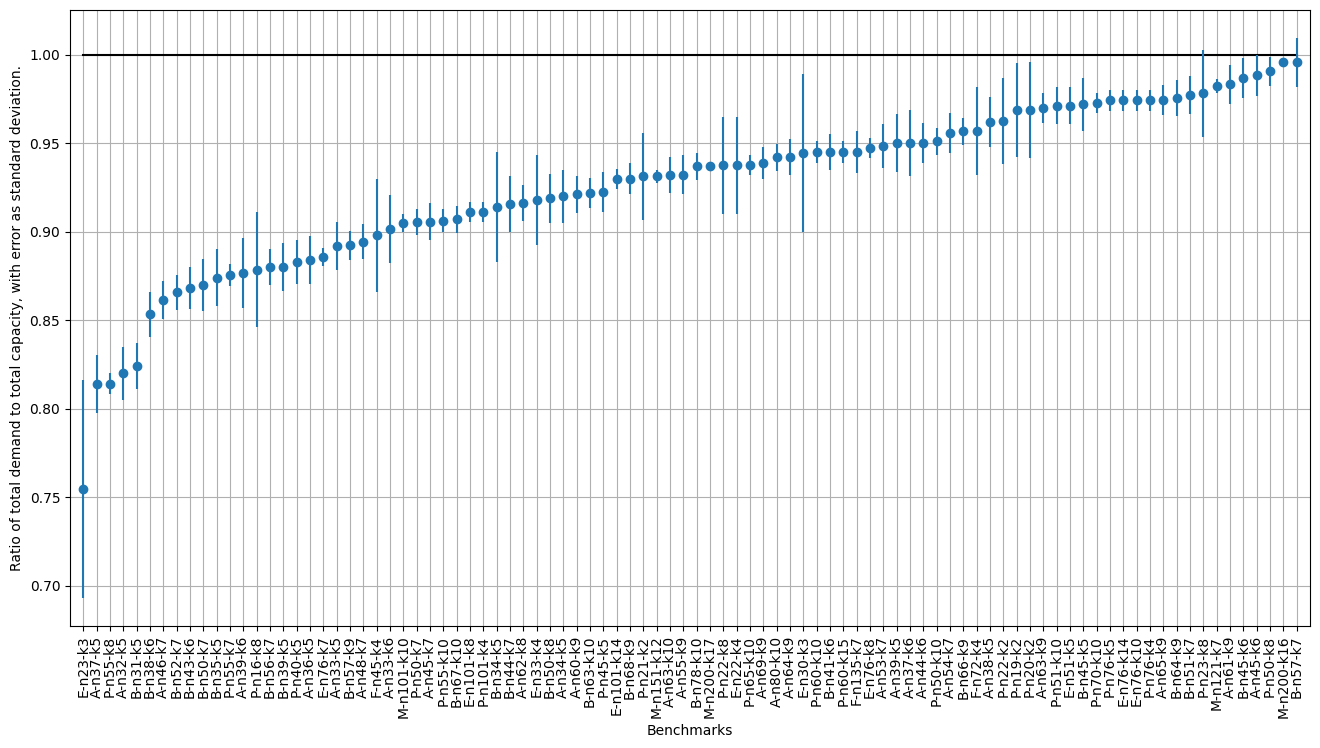

In [46]:
from matplotlib import pyplot as plt

plt.figure(figsize=(16, 8))
plt.plot([1] * len(df), c="black")
plt.errorbar(x=range(len(df)), y=df["Normalised avg"], yerr=df["Normalised Error"], fmt="o")
plt.xticks(
    range(len(df)), labels=df["Benchmark"], rotation="vertical"
)
plt.grid()
plt.xlim([-1, len(df)])
plt.xlabel("Benchmarks")
plt.ylabel("Ratio of total demand to total capacity, with error as standard deviation.")
plt.show()
